# Introduction about the Project

The smartphone sensor data was collected from the experiments conducted on a group of 30 volunteers who were within the age bracket of 19 - 48 years. The set of physical activities focused by the authors are walking, sitting, standing, laying, walking upstairs and walking downstairs. Each subject was instructed to perform each of the six activities twice. On the first trial, the smartphone was firmly attached on the left side of the waist of the subject but in the second trial, the subject was given the opportunity to place the smartphone as they preferred. This insured there is variation in data based on the position of the phone for the same activity. Signals produced by the accelerometer and gyroscope. 

An accelerometer is used to measure the acceleration of the device. Values along the X, Y and Z axis are utilized to detect motions. Values provided over the three axes also include the gravitational acceleration of the earth (g = 9.81 m/s2). If the mobile device is at rest, it would only show the gravitational acceleration over one of the axes based on the SENSOR BASED HUMAN ACTIVITY RECOGNITION USING SMARTPHONES 15 orientation. 

A gyroscope, on the other hand, makes use of angular velocity to calculate the rotation or twist in a smartphone device. The rate of rotation is measured in rad/s along the three axes. While an accelerometer detects directional movement, a gyroscope detects the lateral orientation of the device. Both the sensors are used to measure the rate of change, but for
different things. 

### Quick overview of the dataset :



1. Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x,y and z components each.


2. Gyroscope readings are the measure of angular velocities which has x,y and z components.


3. Jerk signals are calculated for BodyAcceleration readings.


4. Fourier Transforms are made on the above time readings to obtain frequency readings.


5. Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.


6. By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(tAcc-   XYZ)   from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.
    prefix 't' in those metrics denotes time.
      suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.
      
  
7. The accelertion signal was seperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz.


8. After that, the body linear acceleration and angular velocity were derived in time to obtain jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).


9. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.


10. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.,.

### Objective 

The problem this project aims to detect the Human Activity from the Recognition database using the visualization/graphs. First, we classify the activity is Stationary activity or Moving activity. After that, we distinguished with in the Stationary activity and moving activity.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Obtain the train data

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
df.shape

(7352, 563)

In [7]:
 cols = df.columns.tolist()

### Print the all the column names

In [8]:
cols

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [9]:
#All the names of the cols which we collected using the accelerometer.
AccCols = []
for col in cols:
    if "Acc" in col:
        AccCols.append(col)
AccCols

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [10]:
#All the names of the cols which we collected using the gyroscope
GyroCols = []
for col in cols:
    if "Gyro" in col:
        GyroCols.append(col)
GyroCols

['tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyro-mad()-X',
 'tBodyGyro-mad()-Y',
 'tBodyGyro-mad()-Z',
 'tBodyGyro-max()-X',
 'tBodyGyro-max()-Y',
 'tBodyGyro-max()-Z',
 'tBodyGyro-min()-X',
 'tBodyGyro-min()-Y',
 'tBodyGyro-min()-Z',
 'tBodyGyro-sma()',
 'tBodyGyro-energy()-X',
 'tBodyGyro-energy()-Y',
 'tBodyGyro-energy()-Z',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-iqr()-Y',
 'tBodyGyro-iqr()-Z',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-entropy()-Y',
 'tBodyGyro-entropy()-Z',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-X,3',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Y,2',
 'tBodyGyro-arCoeff()-Y,3',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,2',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyro-correlation()-Y,

### Checking for NaN/null values

In [11]:
df.isnull().values.any()

False

### Check for Duplicates

In [12]:
df.duplicated().sum()

0

* __mean():__ Mean value.
* __std():__ Standard deviation.
* __mad():__ Median absolute deviation.
* __max():__ Largest value in array.
* __min():__ Smallest value in array.
* __sma():__ Signal magnitude area is a statistical measure of the magnitude of a varying quantity.
* __energy():__ Energy measure. Sum of the squares divided by the number of values.
* __iqr():__ Interquartile range.
* __entropy():__ Signal entropy.
* __arCoeff():__ Autorregresion coefficients with Burg order equal to 4.
* __correlation():__ Correlation coefficient between two signals.
* __maxInds():__ Index of the frequency component with largest magnitude.
* __meanFreq():__ Weighted average of the frequency components to obtain a mean frequency.
* __skewness():__ Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
* __kurtosis():__ Kurtosis is the sharpness of the peak of a frequency-distribution curve.
* __bandsEnergy():__ Energy of a frequency interval within the 64 bins of the FFT of each window.
* __angle():__ Angle between two vectors.

In [13]:
df_STANDING = df[df.Activity == 'STANDING']

In [14]:
df_STANDING.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7195,0.274527,-0.032259,-0.110678,-0.990631,-0.687065,-0.885434,-0.991251,-0.676243,-0.864352,-0.935640,...,-0.857197,-0.011990,0.215740,0.867603,-0.868352,-0.888077,0.173534,-0.000707,30,STANDING
7196,0.270246,-0.067724,-0.147258,-0.990453,-0.774064,-0.926984,-0.991050,-0.793255,-0.922003,-0.937346,...,-0.668811,-0.022586,-0.039992,0.725042,-0.744780,-0.880750,0.179059,0.001008,30,STANDING
7197,0.274422,-0.021115,-0.096432,-0.993005,-0.907217,-0.937185,-0.994032,-0.909919,-0.929252,-0.938918,...,-0.492137,0.049622,-0.053859,-0.582824,-0.655946,-0.857129,0.196654,0.009921,30,STANDING
7198,0.274834,-0.014149,-0.080437,-0.978700,-0.871865,-0.903318,-0.984797,-0.906035,-0.908251,-0.907795,...,-0.037792,0.051835,0.102538,-0.639664,-0.860865,-0.852759,0.199518,0.007930,30,STANDING
7199,0.277676,0.011021,-0.062292,-0.958620,-0.815830,-0.849154,-0.971655,-0.820806,-0.851430,-0.809207,...,-0.733206,0.056860,0.012306,0.580791,0.737760,-0.855076,0.196527,-0.002069,30,STANDING


In [15]:
df_SITTING = df[df.Activity == 'SITTING']

In [16]:
df_SITTING.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
27,0.144504,0.189263,0.062769,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,...,-0.241781,0.013526,0.043354,0.021485,0.046689,-0.667085,0.054216,-0.218875,1,SITTING
28,0.287252,-0.037455,-0.145974,-0.982915,-0.891605,-0.941438,-0.984418,-0.891373,-0.933361,-0.931896,...,-0.899523,0.194735,-0.148056,0.033529,-0.127028,-0.564807,-0.027045,-0.266055,1,SITTING
29,0.279998,-0.019484,-0.105724,-0.992818,-0.940350,-0.981493,-0.993092,-0.936927,-0.980669,-0.935389,...,-0.928548,-0.228688,-0.097215,0.024192,0.006329,-0.579367,-0.021567,-0.257530,1,SITTING
30,0.221847,0.034108,-0.123612,-0.814708,-0.749418,-0.571899,-0.878682,-0.776895,-0.700710,-0.737152,...,0.596733,0.179223,0.077595,0.056348,-0.316727,-0.582806,-0.020756,-0.255270,1,SITTING
31,-0.041701,0.175102,0.025552,-0.758393,-0.586537,-0.439110,-0.774118,-0.555350,-0.438736,-0.737152,...,0.256095,0.114760,0.114436,-0.070782,-0.001461,-0.552939,-0.053539,-0.260424,1,SITTING


In [17]:
df_WALKING = df[df.Activity == 'WALKING']

In [18]:
df_WALKING.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
78,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,-0.154731,...,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,1,WALKING
79,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,-0.154731,...,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,1,WALKING
80,0.254867,0.003815,-0.123658,-0.275158,0.013080,-0.284371,-0.341341,-0.026013,-0.320272,-0.175559,...,-0.696201,0.372041,-0.106184,-0.923835,0.344459,-0.757414,0.264452,0.039417,1,WALKING
81,0.343370,-0.014446,-0.167377,-0.229924,0.173911,-0.213388,-0.282882,0.144693,-0.237987,-0.152773,...,-0.546873,-0.378574,-0.582073,-0.886349,0.063337,-0.762534,0.260850,0.039735,1,WALKING
82,0.276240,-0.029638,-0.142616,-0.226577,0.164288,-0.122545,-0.239526,0.140287,-0.148617,-0.152773,...,-0.269192,-0.072906,0.656842,-0.291200,0.077922,-0.763968,0.259629,0.041412,1,WALKING


In [19]:
df_WALKING_UPSTAIRS = df[df.Activity == 'WALKING_UPSTAIRS']

In [20]:
df_WALKING_UPSTAIRS.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
150,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,0.087381,-0.220939,...,-0.685946,0.198799,-0.515058,-0.960808,0.798595,-0.730180,0.275743,0.075790,1,WALKING_UPSTAIRS
151,0.279183,-0.036966,-0.133604,-0.359032,-0.124112,-0.102868,-0.394230,-0.120456,-0.027792,-0.319136,...,-0.621552,-0.183312,-0.366714,-0.932361,0.257390,-0.695481,0.303214,0.065482,1,WALKING_UPSTAIRS
152,0.301162,-0.001759,-0.106830,-0.362666,0.001220,-0.111538,-0.400837,-0.001549,-0.028194,-0.269518,...,-0.881817,-0.140795,-0.235431,-0.904871,-0.524824,-0.681620,0.311837,0.070519,1,WALKING_UPSTAIRS
153,0.293411,-0.018715,-0.066159,-0.368157,0.095663,-0.019262,-0.430579,0.108432,0.027044,-0.169848,...,-0.834194,-0.099332,-0.413970,-0.968821,-0.132384,-0.686715,0.308243,0.070468,1,WALKING_UPSTAIRS
154,0.230310,0.002174,-0.043103,-0.335254,-0.020444,0.031210,-0.398985,-0.039489,0.097693,-0.169848,...,-0.862534,0.360594,0.455744,0.777628,-0.057846,-0.693267,0.306133,0.058967,1,WALKING_UPSTAIRS


In [21]:
df_WALKING_DOWNSTAIRS = df[df.Activity == 'WALKING_DOWNSTAIRS']

In [22]:
df_WALKING_DOWNSTAIRS.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
125,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.691170,-0.294788,-0.582192,0.046131,-0.112673,-0.768340,0.256712,0.040474,1,WALKING_DOWNSTAIRS
126,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.781699,-0.272805,0.315993,0.783686,-0.288010,-0.790764,0.242048,0.032582,1,WALKING_DOWNSTAIRS
127,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.729144,-0.048504,0.653022,0.972225,0.530882,-0.802236,0.234166,0.031817,1,WALKING_DOWNSTAIRS
128,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.656273,0.000211,0.068551,0.955958,-0.616748,-0.803619,0.231639,0.043237,1,WALKING_DOWNSTAIRS
129,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,-0.916847,-0.027583,0.432610,-0.943390,0.107830,-0.800668,0.233024,0.046865,1,WALKING_DOWNSTAIRS


In [23]:
df_LAYING = df[df.Activity == 'LAYING']

In [24]:
df_LAYING.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
51,0.403474,-0.015074,-0.118167,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,-0.785104,...,-0.021764,-0.068580,-0.043105,-0.332249,0.487505,0.432479,-0.553351,-0.432876,1,LAYING
52,0.278373,-0.020561,-0.096825,-0.984883,-0.991118,-0.982112,-0.987985,-0.990362,-0.982189,-0.920051,...,-0.912512,-0.113048,0.223038,-0.393075,0.359037,0.399853,-0.550364,-0.427593,1,LAYING
53,0.276555,-0.017869,-0.107621,-0.994195,-0.996372,-0.995615,-0.994901,-0.996360,-0.996628,-0.940164,...,-0.813040,0.293145,-0.018635,-0.246980,0.453923,0.399066,-0.546725,-0.431244,1,LAYING
54,0.279575,-0.017276,-0.109481,-0.996135,-0.995812,-0.998689,-0.996393,-0.995474,-0.999006,-0.940773,...,-0.984028,0.240526,0.149804,0.393611,0.386719,0.399555,-0.546477,-0.431646,1,LAYING
55,0.276527,-0.016819,-0.107983,-0.996775,-0.997256,-0.995422,-0.997167,-0.997108,-0.995739,-0.942673,...,-0.954254,-0.347519,-0.469155,0.308855,-0.354146,0.398889,-0.546712,-0.431207,1,LAYING


### No. of Data per Activity

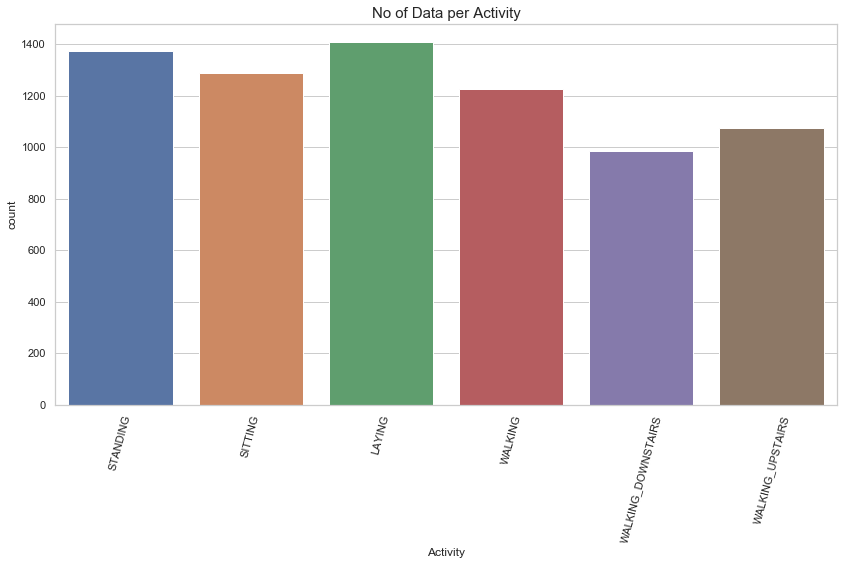

In [25]:
plt.figure(figsize=(14,7))
plt.title('No of Data per Activity', fontsize=15)
sns.countplot(df.Activity)
plt.xticks(rotation=75)
plt.show()

<Figure size 1008x504 with 0 Axes>

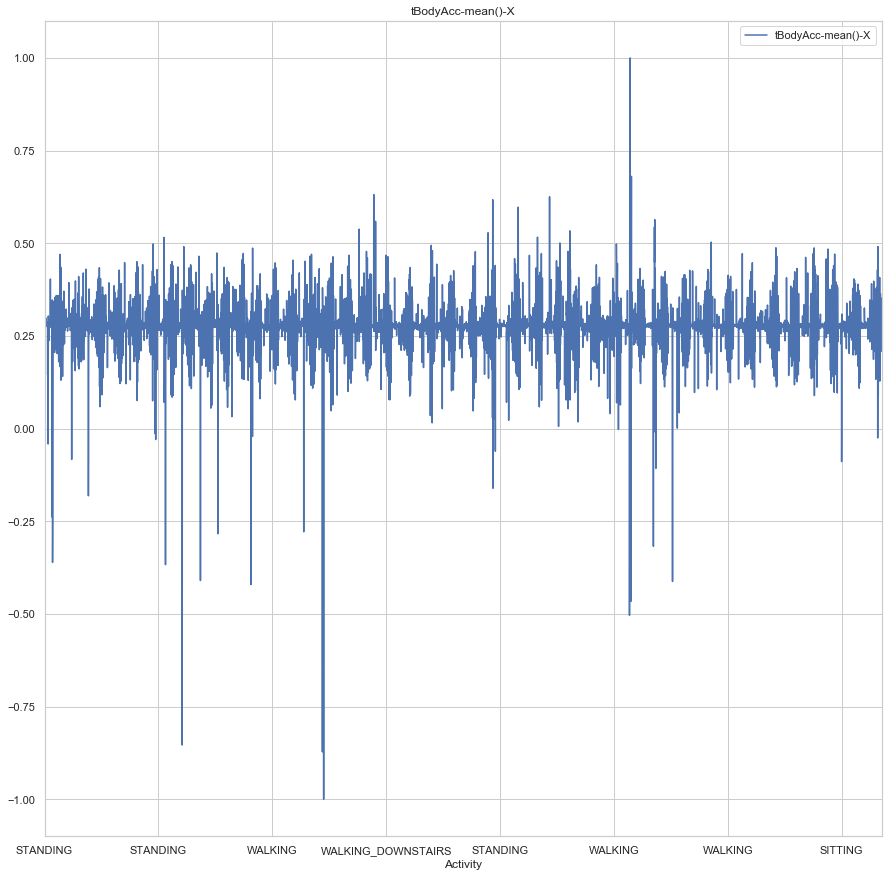

In [26]:
plt.figure(figsize=(14,7))
df.plot(x = 'Activity',y = 'tBodyAcc-mean()-X', figsize= (15,15), grid=True, title="tBodyAcc-mean()-X")

Looking at the data we can say that data is not skwed.

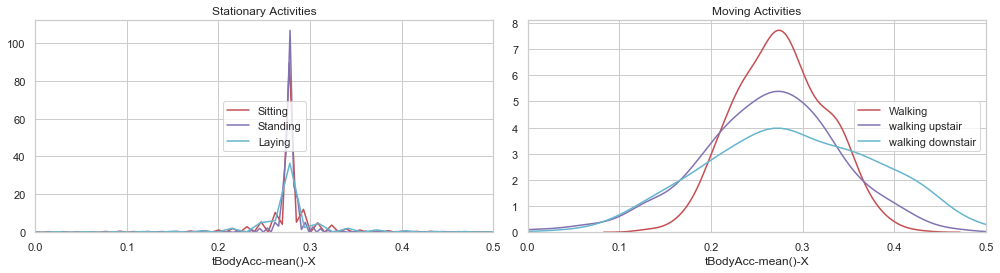

In [28]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['tBodyAcc-mean()-X'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['tBodyAcc-mean()-X'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['tBodyAcc-mean()-X'],hist = False, color = 'c', label = 'Laying')
plt.xlim(0.0,0.5)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['tBodyAcc-mean()-X'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['tBodyAcc-mean()-X'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['tBodyAcc-mean()-X'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(0.0,0.5)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

The feature of ‘MeanBody Acceleration’ along the X,Y axis indicates that the mean value of the body acceleration is more variable for the activities of walking, walking upstairs and walking downstairs than the static activities of sitting, standing and laying. So using this feature we can distinguish between the stationary activity and moving activity 

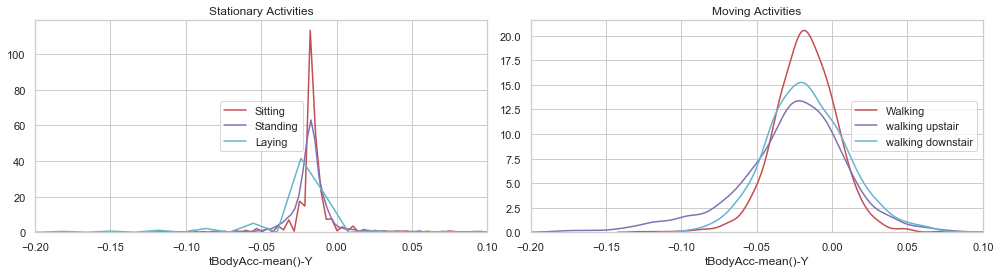

In [29]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['tBodyAcc-mean()-Y'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['tBodyAcc-mean()-Y'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['tBodyAcc-mean()-Y'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-0.20,0.10)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['tBodyAcc-mean()-Y'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['tBodyAcc-mean()-Y'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['tBodyAcc-mean()-Y'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(-0.20,0.10)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

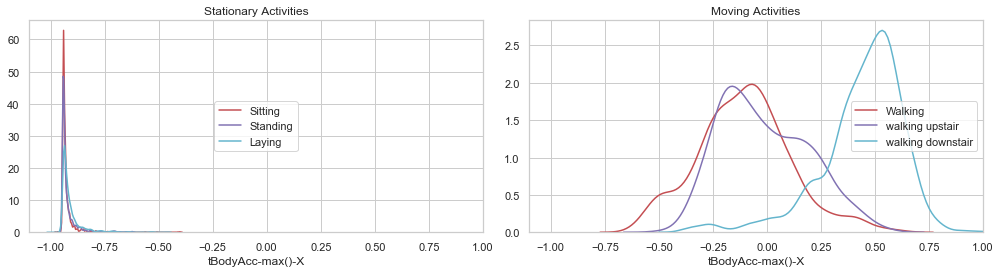

In [30]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['tBodyAcc-max()-X'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['tBodyAcc-max()-X'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['tBodyAcc-max()-X'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-1.1,1)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['tBodyAcc-max()-X'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['tBodyAcc-max()-X'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['tBodyAcc-max()-X'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(-1.1,1)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

The maximum acceleration feature along the X, Y and Z axis is plotted and analyzed indicates that there is a clear distinction in the maximum values between the static and active activities as all the passive activities fall below the active ones. 

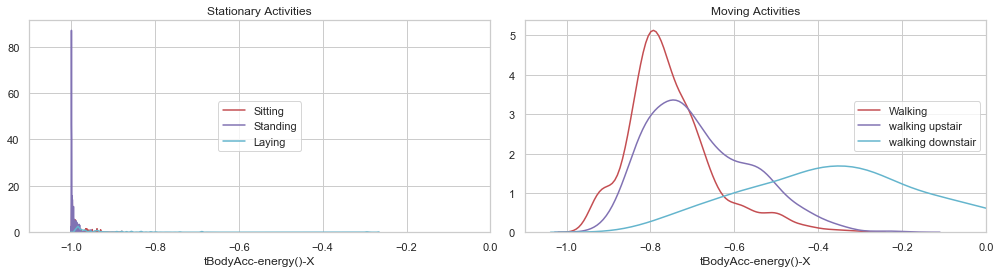

In [31]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['tBodyAcc-energy()-X'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['tBodyAcc-energy()-X'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['tBodyAcc-energy()-X'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-1.1,0)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['tBodyAcc-energy()-X'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['tBodyAcc-energy()-X'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['tBodyAcc-energy()-X'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(-1.1,0)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

The plot shows a clear distinction for the 'Standing' activity from the other Activity. Most of the value for the 'Standing' activity is near about -1.000. So using this feature we can distinguish the activity with in the Stationary activity.

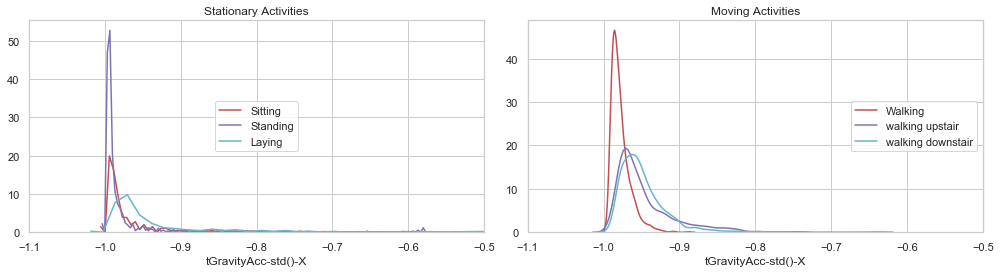

In [32]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['tGravityAcc-std()-X'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['tGravityAcc-std()-X'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['tGravityAcc-std()-X'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-1.1,-0.5)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['tGravityAcc-std()-X'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['tGravityAcc-std()-X'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['tGravityAcc-std()-X'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(-1.1,-0.5)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

The plot shows a clear distinction for the 'Standing' activity from the other Activity. Most of the value for the 'Standing' activity is near about -1.000. So using this feature we can distinguish the activity with in the Stationary activity.

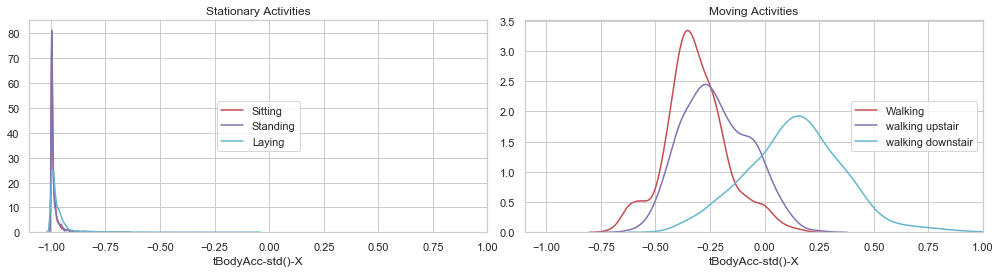

In [33]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['tBodyAcc-std()-X'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['tBodyAcc-std()-X'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['tBodyAcc-std()-X'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-1.1,1)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['tBodyAcc-std()-X'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['tBodyAcc-std()-X'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['tBodyAcc-std()-X'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(-1.1,1)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

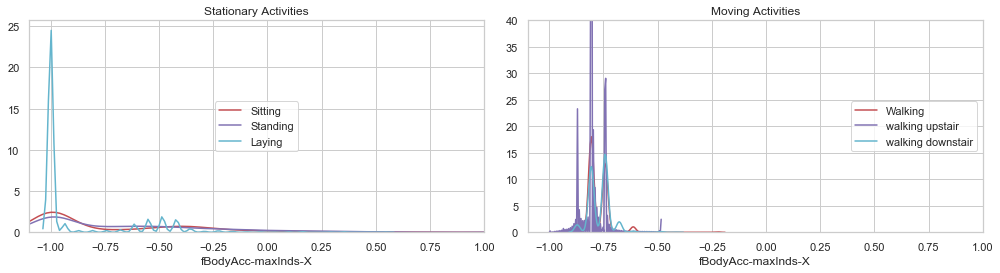

In [34]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['fBodyAcc-maxInds-X'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['fBodyAcc-maxInds-X'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['fBodyAcc-maxInds-X'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-1.1,1)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['fBodyAcc-maxInds-X'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['fBodyAcc-maxInds-X'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['fBodyAcc-maxInds-X'],hist = False,color = 'c',label = 'walking downstair')
plt.legend(loc='center right')
plt.ylim(0,40)
plt.xlim(-1.1,1)
plt.tight_layout()
plt.show()

The plot shows a clear distinction for the 'Laying' activity from the other Activity. For the static Activity and In the Active Activity 'Walking Upstairs' Activity is more vaiable than rest of the others Active Activity. So feature is used to distinguish the LAYING activity.

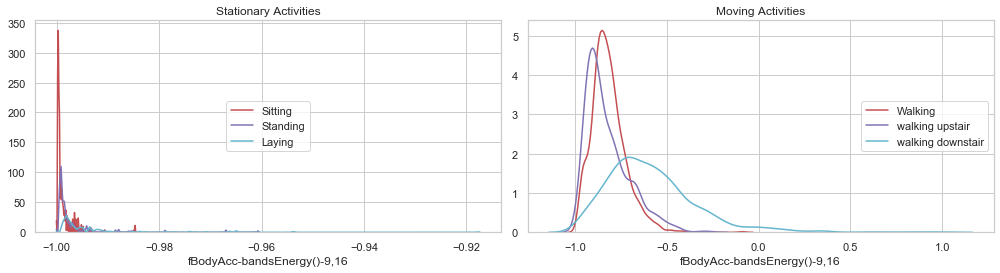

In [35]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['fBodyAcc-bandsEnergy()-9,16'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['fBodyAcc-bandsEnergy()-9,16'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['fBodyAcc-bandsEnergy()-9,16'],hist = False, color = 'c', label = 'Laying')
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['fBodyAcc-bandsEnergy()-9,16'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['fBodyAcc-bandsEnergy()-9,16'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['fBodyAcc-bandsEnergy()-9,16'],hist = False,color = 'c',label = 'walking downstair')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

This is graph plotted for feature 'angle(X,gravityMean). The plot shows a clear distinction for the 'Sitting' activity from the other Activity. Most of the value for the 'Sitting' activity is near about -1.000. So this is used to distinguish the Sitting Activity

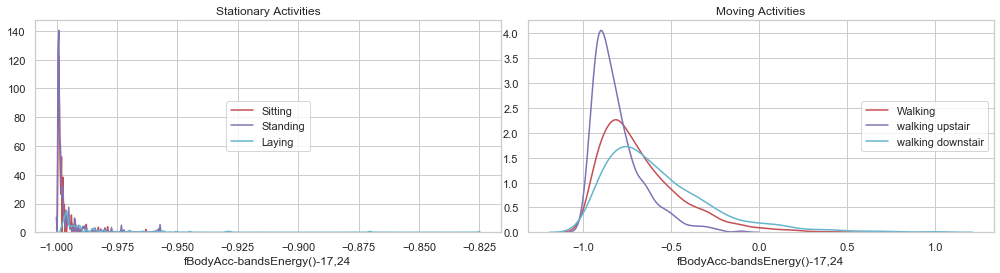

In [36]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['fBodyAcc-bandsEnergy()-17,24'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['fBodyAcc-bandsEnergy()-17,24'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['fBodyAcc-bandsEnergy()-17,24'],hist = False, color = 'c', label = 'Laying')
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['fBodyAcc-bandsEnergy()-17,24'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['fBodyAcc-bandsEnergy()-17,24'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['fBodyAcc-bandsEnergy()-17,24'],hist = False,color = 'c',label = 'walking downstair')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

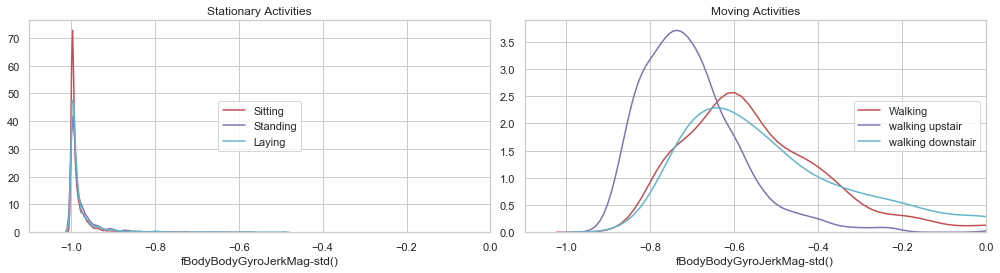

In [37]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df_SITTING['fBodyBodyGyroJerkMag-std()'],hist = False,color = 'r', label = 'Sitting')
sns.distplot(df_STANDING['fBodyBodyGyroJerkMag-std()'],hist = False, color = 'm', label = 'Standing')
sns.distplot(df_LAYING['fBodyBodyGyroJerkMag-std()'],hist = False, color = 'c', label = 'Laying')
plt.xlim(-1.1,0)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df_WALKING['fBodyBodyGyroJerkMag-std()'],hist = False,color = 'r',label = 'Walking')
sns.distplot(df_WALKING_UPSTAIRS['fBodyBodyGyroJerkMag-std()'],hist = False,color = 'm',label = 'walking upstair')
sns.distplot(df_WALKING_DOWNSTAIRS['fBodyBodyGyroJerkMag-std()'],hist = False,color = 'c',label = 'walking downstair')
plt.xlim(-1.1,0)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

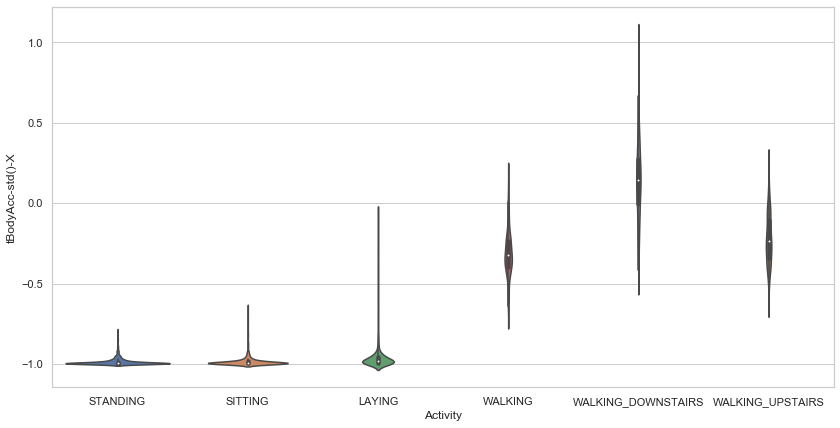

In [38]:
fig = plt.figure(figsize=(14,7)) # define plot area
ax = sns.violinplot(x="Activity", y="tBodyAcc-std()-X", data=df)

This violin plot clearly shows there is a difference between the variance in the stationary activity and moving activity

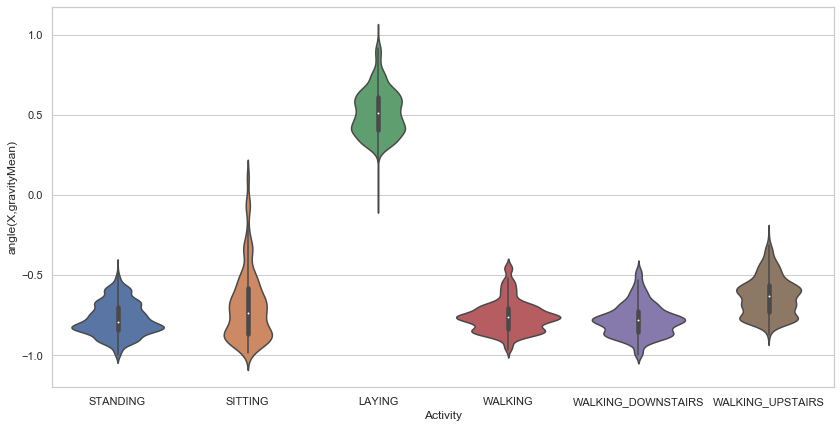

In [39]:
fig = plt.figure(figsize=(14,7)) 
ax = sns.violinplot(x="Activity", y="angle(X,gravityMean)", data=df)

This is graph plotted for feature 'angle(X,gravityMean)'. The plot shows a clear distinction for the 'Laying' activity from the other Activity